# **MACHINE LEARNING LAB - 6**

# **Problem Statement : Performing handwritten digit classification using SVM and Neural Network**


**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import os
from sklearn.linear_model import LogisticRegression 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")

**Load the data**

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] ='/content' 

In [ ]:
!kaggle competitions download -c digit-recognizer 
!unzip \*.zip && rm *.zip 

 59% 9.00M/15.3M [00:00<00:00, 37.6MB/s]
100% 15.3M/15.3M [00:00<00:00, 56.8MB/s]
Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
df = pd.read_csv("train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x = df.drop('label', axis=1).values
y = df['label'].values

**Exercise 1: Perform handwritten digit classification using Support Vector Machine (SVM) model. Plot “hyperparameter vs. train-accuracy” and “hyperparameter vs. cv-accuracy” graphs. Measure model performance on test data using following metrics: accuracy, confusion matrix, precision, recall and F1 Score.**


**Splitting data into Train and test sets with Stratified Sampling using train_test_split()**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state = 42)

In [ ]:
parameters = {'kernel':['linear', 'rbf'], 'gamma':['scale', 'auto']}
grid = GridSearchCV(estimator=SVC(), param_grid=parameters, cv=4, verbose=2, n_jobs=-1, return_train_score=True)
grid.fit(X_train, y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


GridSearchCV(cv=4, estimator=SVC(), n_jobs=-1,
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             return_train_score=True, verbose=2)

In [ ]:
grid.cv_results_

{'mean_fit_time': array([ 7.63054675, 15.91091096,  6.54129779, 73.60623616]),
 'std_fit_time': array([1.85191375, 0.88296006, 0.41613358, 1.45455974]),
 'mean_score_time': array([ 3.85800904,  9.77248847,  3.76519483, 19.33980739]),
 'std_score_time': array([0.1880982 , 1.88898342, 0.15057636, 2.26061214]),
 'param_gamma': masked_array(data=['scale', 'scale', 'auto', 'auto'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'gamma': 'scale', 'kernel': 'linear'},
  {'gamma': 'scale', 'kernel': 'rbf'},
  {'gamma': 'auto', 'kernel': 'linear'},
  {'gamma': 'auto', 'kernel': 'rbf'}],
 'split0_test_score': array([0.90666667, 0.94952381, 0.90666667, 0.11047619]),
 'split1_test_score': array([0.90142857, 0.9547619 , 0.90142857, 0.11047619]),
 'split2_test_scor

**Plotting Graphs CV-accuracy vs Hyperparameters**

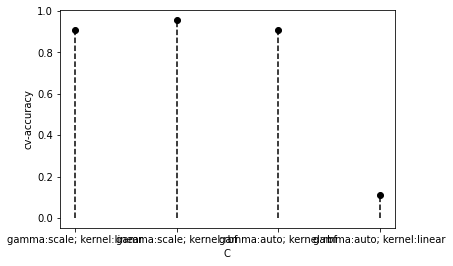

In [ ]:
C_vals = ['gamma:scale; kernel:linear', 'gamma:scale; kernel:rbf', 'gamma:auto; kernel:rbf', 'gamma:auto; kernel:linear']

plt.xlabel("C")
plt.ylabel("cv-accuracy")
plt.scatter(C_vals, grid.cv_results_['mean_test_score'], color='black')
plt.vlines(C_vals, 0, grid.cv_results_['mean_test_score'], linestyle="dashed")
plt.xticks(C_vals)
plt.show()

**Plotting Graphs train-accuracy vs Hyperparameters**

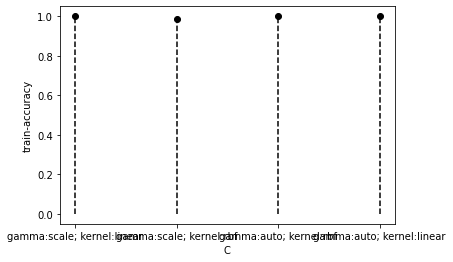

In [ ]:
plt.xlabel("C")
plt.ylabel("train-accuracy")
plt.scatter(C_vals, grid.cv_results_['mean_train_score'], color='black')
plt.vlines(C_vals, 0, grid.cv_results_['mean_train_score'], linestyle="dashed")
plt.xticks(C_vals)
plt.show()

In [ ]:
model = SVC(gamma='scale', kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[3296    0    3    1    9    6   10    2    5    2]
 [   0 3711   17    6    4    3    5    7    8    3]
 [  16   11 3228   17   24    6   21   30   23    4]
 [   4   12   45 3267    0   59    9   21   57   19]
 [   5   11   12    0 3106    1   14    5    6   99]
 [  11    4    6   44    8 2872   51    3   16    8]
 [  27    8    9    0   16   16 3207    0    5    0]
 [   4   17   28    7   24    2    0 3337    7   46]
 [   8   17   12   32   16   34   17    6 3091   20]
 [  10   12    4   50   52   10    1   60   23 3112]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3334
           1       0.98      0.99      0.98      3764
           2       0.96      0.96      0.96      3380
           3       0.95      0.94      0.94      3493
           4       0.95      0.95      0.95      3259
           5       0.95      0.95      0.95      3023
           6       0.96      0.98      0.97      3288
           7       0.96      0.96      0.96      3472
           8       0.95      0.95      0.95      3253
           9       0.94      0.93      0.94      3334

    accuracy                           0.96     33600
   macro avg       0.96      0.96      0.96     33600
weighted avg       0.96      0.96      0.96     33600



**Exercise 2: Perform handwritten digit classification using neural network model with single hidden layer. Plot “hyperparameter vs. train-accuracy” and “hyperparameter vs. cv-accuracy” graphs. Measure model performance on test data using following metrics: accuracy, confusion matrix, precision, recall and F1 Score.** 

In [ ]:
parameters = {'hidden_layer_sizes':[(50,), (100,)], 'learning_rate_init':[0.001, 0.0005]}
grid = GridSearchCV(MLPClassifier(), param_grid=parameters, cv=4, verbose=2, n_jobs=-1, return_train_score=True)
grid.fit(X_train, y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


GridSearchCV(cv=4, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(50,), (100,)],
                         'learning_rate_init': [0.001, 0.0005]},
             return_train_score=True, verbose=2)

In [ ]:
grid.cv_results_

{'mean_fit_time': array([17.08081365, 18.38365906, 12.97479403, 13.34521925]),
 'std_fit_time': array([3.7407115 , 5.0631734 , 2.53427552, 1.95650753]),
 'mean_score_time': array([0.01818663, 0.02075845, 0.03920406, 0.03020233]),
 'std_score_time': array([0.00033449, 0.00403612, 0.01118352, 0.00338804]),
 'param_hidden_layer_sizes': masked_array(data=[(50,), (50,), (100,), (100,)],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate_init': masked_array(data=[0.001, 0.0005, 0.001, 0.0005],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001},
  {'hidden_layer_sizes': (50,), 'learning_rate_init': 0.0005},
  {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001},
  {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.0005}],
 'split0_test_score': array([0.88380952, 0.86904762, 0.89285714, 0.8785

**Plotting Graphs CV-accuracy vs Hyperparameters**

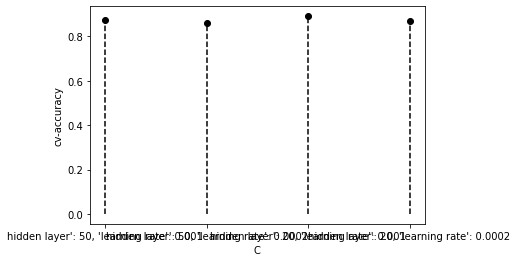

In [ ]:
C_vals = ["hidden layer': 50, 'learning rate': 0.001", 
         "hidden layer': 50, 'learning rate': 0.0002",
         "hidden layer': 20, 'learning rate': 0.001",
         "hidden layer': 20, 'learning rate': 0.0002"]

plt.xlabel("C")
plt.ylabel("cv-accuracy")
plt.scatter(C_vals, grid.cv_results_['mean_test_score'], color='black')
plt.vlines(C_vals, 0, grid.cv_results_['mean_test_score'], linestyle="dashed")
plt.xticks(C_vals)
plt.show()

**Plotting Graphs train-accuracy vs Hyperparameters**

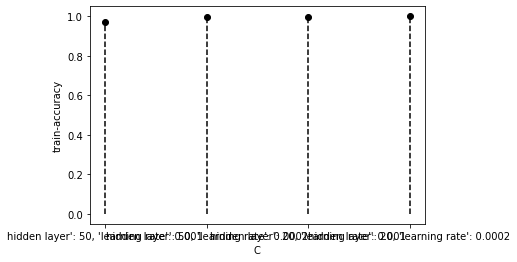

In [ ]:
plt.xlabel("C")
plt.ylabel("train-accuracy")
plt.scatter(C_vals, grid.cv_results_['mean_train_score'], color='black')
plt.vlines(C_vals, 0, grid.cv_results_['mean_train_score'], linestyle="dashed")
plt.xticks(C_vals)
plt.show()

In [ ]:
model = MLPClassifier(hidden_layer_sizes=100, learning_rate_init=0.0005)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[3177    0   19   12   11   39   45    6   21   12]
 [   1 3612   18   18    3   14    9   14   23    6]
 [  17   38 3020   53   45   16   43   34   54   11]
 [  11   28  124 2994    9  127   21   29  112   34]
 [   3   11   17    8 2914   23   38   23   21  185]
 [  28   15   25   71   32 2665   37   11   75   41]
 [  41    5   17    3   24   40 3149    5   15    3]
 [  11   15   44   39   53   16    2 3233   20  121]
 [  20   49  106  124   34   92   51   12 2717   59]
 [  13   19   17   84  169   26    4   95   35 2895]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      3342
           1       0.95      0.97      0.96      3718
           2       0.89      0.91      0.90      3331
           3       0.88      0.86      0.87      3489
           4       0.88      0.90      0.89      3243
           5       0.87      0.89      0.88      3000
           6       0.93      0.95      0.94      3302
           7       0.93      0.91      0.92      3554
           8       0.88      0.83      0.85      3264
           9       0.86      0.86      0.86      3357

    accuracy                           0.90     33600
   macro avg       0.90      0.90      0.90     33600
weighted avg       0.90      0.90      0.90     33600



**Exercise 3: Compare the performances of logistic regression, SVM and neural networks models on MNIST dataset for digit recognition. Write your observation on the performances of these models**

We are using SVM, Neural Network and Logistic regression and the accuracy we get are as blow


*   SVM :- 96%
*   Neural Network :- 90%
* Logistic regression :- 91%

